<a href="https://colab.research.google.com/github/bingsen-wang/Python-Examples/blob/main/PythonExample_ArrowDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Arrow Styles Demonstration</h1></b>

Dr. Bingsen Wang

7/27/2024
</center>

#Python Code
The Python code illustrates arrows by varying length, width, head_width, overhang, face/edge colors.

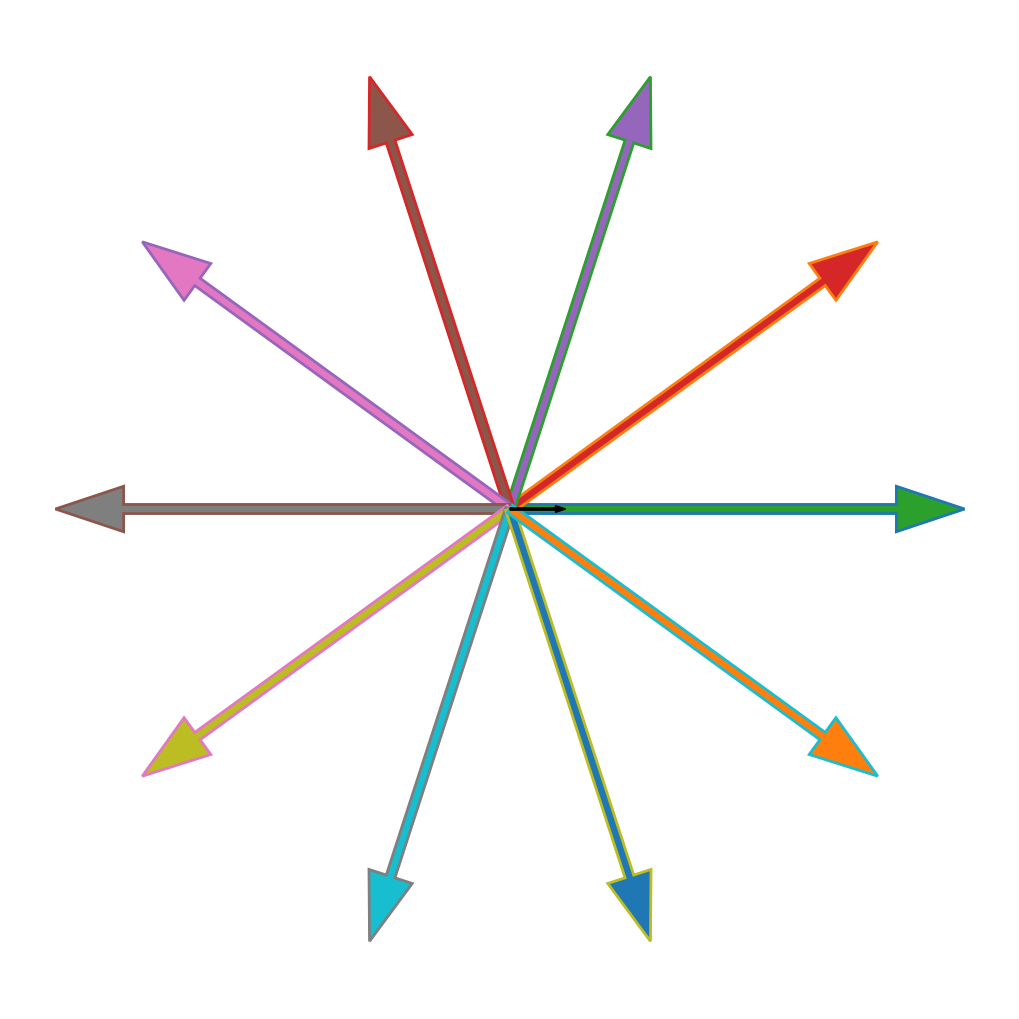

In [58]:
from numpy import linspace,pi
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow as fa
from matplotlib import animation,rc,transforms
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def clearaxes(ax):
  ax.cla()
  ax.set_axis_off()
  ax.set_xlim(-1.1,1.1)
  ax0.set_ylim(-1.1,1.1)

#parameters
Nfps = 10
theta = linspace(0,2*pi*(1-1/Nfps),Nfps)

#plotting
fig = plt.figure(figsize=(10,10))
# as2 = {'width':.05,'head_width':.12,'length_includes_head':True,'overhang':-.4} #arr style
ax0 = fig.add_axes((0,0,1,1),fc='none')
clearaxes(ax0)
# animation function. This is called sequentially
def animate(i):
  ii=int(i/Nfps)
  i=i%Nfps
  r=transforms.Affine2D().rotate_around(0,0,theta[i])+ax0.transData
  match ii: #length change
    case 0:
      ax0.add_patch(fa(0,0,(i+1)/Nfps,0,width=.005,color='k',transform=r))
    case 1: #width change
      if i==0: clearaxes(ax0)
      ax0.add_patch(fa(0,0,1,0,transform=r,width=(i+1)*.05/Nfps,
                       length_includes_head=True,color='k'))
    case 2: #head width change
      if i==0: clearaxes(ax0)
      ax0.add_patch(fa(0,0,1,0,transform=r,width=0.003,head_width=(i+1)*.1/Nfps,
                       length_includes_head=True,color='k'))
    case 3: #overhang
      if i==0: clearaxes(ax0)
      ax0.add_patch(fa(0,0,1,0,transform=r,width=0.01,head_width=.1,
                       overhang=.8-(i+1)*1.6/Nfps,length_includes_head=True,color='k'))
    case 4: #color
      if i==0: clearaxes(ax0)
      ax0.add_patch(fa(0,0,1,0,transform=r,width=0.02,head_width=.1,length_includes_head=True,
                       ec=colors[i%10],fc=colors[(i+2)%10],lw=2))
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps*5, interval=50)
fn = r"PythonExample_ArrowStyles.mp4"
writervideo = animation.FFMpegWriter(fps=2)
anim.save(fn, writer=writervideo,dpi = 200)